In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [14]:
# メッシュサイズと最大計算ステップ
mesh_size = 21
iter_max = 250

# 刻み幅
dx = 1/(mesh_size - 1)
dt = 0.001
r = dt/dx**2

# 拡散係数
Du = 1.0



# 陽解法

In [15]:
# 空間ベクトル
u = np.zeros((mesh_size, 1)) # u(x, t)
u_list = [u.copy()]

# 安定条件の確認
print(1- Du*r)

0.6000000000000001


In [16]:
# ラプラシアン
A =  np.diag(np.ones(mesh_size-1), k=-1) + np.diag(-2*np.ones(mesh_size), k=0) + np.diag(np.ones(mesh_size-1), k=1)
# 周期境界条件
A[0, mesh_size-1] = 1
A[mesh_size-1, 0] = 1

In [17]:
# 初期分布
for i in range(0,mesh_size):
  X = i/(mesh_size-1)
  if mesh_size//3 <=i and i <= 2 * mesh_size//3:
    u[i,:] = 0.5
  else:
    u[i,:] = 0.0

In [18]:
fig = plt.figure()
graphs = []

# 数値計算（陽解法）
for t in range(0,iter_max):
    u_next = u + r*np.dot(A, u)
    u = u_next
    if t%10 == 0:
        u_list.append(u) 

<Figure size 640x480 with 0 Axes>

MovieWriter imagemagick unavailable; using Pillow instead.


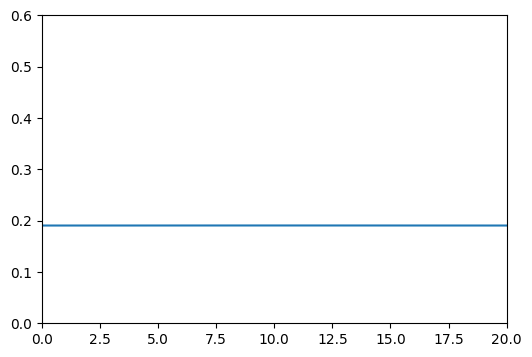

In [ ]:
# アニメーション
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1)

def update_func(i):
    ax.clear()
    ax.set_ylim(0, 0.6)
    ax.set_xlim(0, 20.0)

    ax.plot(u_list[i])
    

ani = animation.FuncAnimation(fig, update_func, frames=len(u_list), interval=200,repeat=True)
ani.save('heat_explicit.gif', writer='imagemagick')

# 表示
plt.show()

## 陰解法

In [20]:
# 空間ベクトル
u = np.zeros((mesh_size, 1)) # u(x, t)
u_list = [u.copy()]

In [ ]:
A =  np.diag((-Du*r)*np.ones(mesh_size-1), k=-1) + np.diag((1+2*Du*r)*np.ones(mesh_size), k=0) + np.diag((-Du*r)*np.ones(mesh_size-1), k=1)
# 周期境界条件
A[0, mesh_size-1] = -Du*r
A[mesh_size-1, 0] = -Du*r

Ainv = np.linalg.inv(A)

In [22]:
# 初期分布
for i in range(0,mesh_size):
  X = i/(mesh_size-1)
  if mesh_size//3 <=i and i <= 2 * mesh_size//3:
    u[i,:] = 0.5
  else:
    u[i,:] = 0.0

In [23]:
fig = plt.figure()
graphs = []

# 数値計算（陽解法）
for t in range(0,iter_max):
    u_next = np.dot(Ainv, u)
    u = u_next
    if t%10 == 0:
        u_list.append(u) 

<Figure size 640x480 with 0 Axes>

MovieWriter imagemagick unavailable; using Pillow instead.


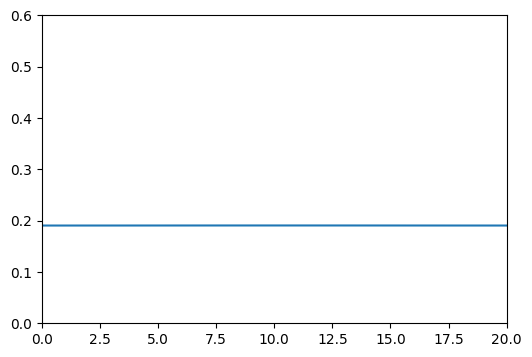

In [ ]:
# アニメーション
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1)

def update_func(i):
    ax.clear()
    ax.set_ylim(0, 0.6)
    ax.set_xlim(0, 20.0)

    ax.plot(u_list[i])
    

ani = animation.FuncAnimation(fig, update_func, frames=len(u_list), interval=200,repeat=True)
ani.save('heat_implicit.gif', writer='imagemagick')

# 表示
plt.show()